In [1]:
#import dependencies
import os
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import DataFrame

# Shot Types Analysis

In [2]:
game_plays_df=pd.read_csv("game_plays.csv")
game_plays_df.head()

play_id     game_id  team_id_for  team_id_against           event  \
0  2016020045_1  2016020045          NaN              NaN  Game Scheduled   
1  2016020045_2  2016020045          NaN              NaN    Period Ready   
2  2016020045_3  2016020045          NaN              NaN    Period Start   
3  2016020045_4  2016020045         16.0              4.0         Faceoff   
4  2016020045_5  2016020045         16.0              4.0            Shot   

  secondaryType     x    y  period periodType  periodTime  \
0           NaN   NaN  NaN       1    REGULAR           0   
1           NaN   NaN  NaN       1    REGULAR           0   
2           NaN   NaN  NaN       1    REGULAR           0   
3           NaN   0.0  0.0       1    REGULAR           0   
4    Wrist Shot -71.0  9.0       1    REGULAR          54   

   periodTimeRemaining             dateTime  goals_away  goals_home  \
0               1200.0  2016-10-18 23:40:58           0           0   
1               1200.0  2016-10-19 01:35:28           0           0   
2               1200.0  2016-10-19 01:40:50           0           0   
3               1200.0  2016-10-19 01:40:50           0           0   
4               1146.0  2016-10-19 01:41:44           0           0   

                                         description  st_x  st_y  
0                                     Game Scheduled   NaN   NaN  
1                                       Period Ready   NaN   NaN  
2                                       Period Start   NaN   NaN  
3   Jonathan Toews faceoff won against Claude Giroux   0.0   0.0  
4  Artem Anisimov Wrist Shot saved by Michal Neuv...  71.0  -9.0

In [3]:
game_plays_df.isna().sum()

play_id                      0
game_id                      0
team_id_for             932705
team_id_against         932705
event                        0
secondaryType          3868513
x                      1134364
y                      1134333
period                       0
periodType                   0
periodTime                   0
periodTimeRemaining     193019
dateTime                     0
goals_away                   0
goals_home                   0
description                  0
st_x                   1134364
st_y                   1134364
dtype: int64

In [4]:
game_plays_df.event.unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Shot', 'Goal', 'Takeaway', 'Hit', 'Stoppage', 'Blocked Shot',
       'Giveaway', 'Missed Shot', 'Penalty', 'Period End',
       'Period Official', 'Game End', 'Official Challenge',
       'Shootout Complete', 'Early Intermission Start',
       'Early Intermission End', 'Game Official', 'Emergency Goaltender'],
      dtype=object)

In [5]:
# get plays that are either a shot or a goal
shots_df = game_plays_df.loc[(game_plays_df['event'] == 'Shot') | (game_plays_df['event'] == 'Goal')]

# remove N/A's
shots_df = shots_df.dropna()
shots_df.head()

play_id     game_id  team_id_for  team_id_against event  \
4    2016020045_5  2016020045         16.0              4.0  Shot   
5    2016020045_6  2016020045         16.0              4.0  Goal   
7    2016020045_8  2016020045          4.0             16.0  Shot   
11  2016020045_12  2016020045         16.0              4.0  Shot   
16  2016020045_17  2016020045          4.0             16.0  Shot   

   secondaryType     x     y  period periodType  periodTime  \
4     Wrist Shot -71.0   9.0       1    REGULAR          54   
5    Wrap-around -88.0   5.0       1    REGULAR          56   
7     Wrist Shot  56.0  -7.0       1    REGULAR          69   
11     Slap Shot -37.0 -24.0       1    REGULAR         133   
16    Wrist Shot  57.0 -20.0       1    REGULAR         168   

    periodTimeRemaining             dateTime  goals_away  goals_home  \
4                1146.0  2016-10-19 01:41:44           0           0   
5                1144.0  2016-10-19 01:41:48           0           1   
7                1131.0  2016-10-19 01:42:41           0           1   
11               1067.0  2016-10-19 01:43:45           0           1   
16               1032.0  2016-10-19 01:44:54           0           1   

                                          description  st_x  st_y  
4   Artem Anisimov Wrist Shot saved by Michal Neuv...  71.0  -9.0  
5   Patrick Kane (1) Wrap-around, assists: Artem A...  88.0  -5.0  
7       Dale Weise Wrist Shot saved by Corey Crawford  56.0  -7.0  
11    Duncan Keith Slap Shot saved by Michal Neuvirth  37.0  24.0  
16  Wayne Simmonds Wrist Shot saved by Corey Crawford  57.0 -20.0

In [7]:
# Descriptive Statistics of Shots
shots_df.describe()

game_id    team_id_for  team_id_against              x  \
count  9.294190e+05  929419.000000    929419.000000  929419.000000   
mean   2.015334e+09      17.864289        17.835228       0.007384   
std    3.003263e+06      12.635501        12.624619      63.553664   
min    2.010020e+09       1.000000         1.000000     -99.000000   
25%    2.013020e+09       8.000000         8.000000     -64.000000   
50%    2.016020e+09      16.000000        16.000000      -2.000000   
75%    2.018021e+09      24.000000        24.000000      64.000000   
max    2.019041e+09      90.000000        90.000000      99.000000   

                   y         period     periodTime  periodTimeRemaining  \
count  929419.000000  929419.000000  929419.000000        929419.000000   
mean       -0.280003       2.058624     588.655976           588.746680   
std        18.960734       0.889376     350.769851           347.919651   
min       -42.000000       1.000000       0.000000             0.000000   
25%       -14.000000       1.000000     280.000000           286.000000   
50%         0.000000       2.000000     580.000000           590.000000   
75%        13.000000       3.000000     892.000000           892.000000   
max        42.000000       8.000000    1200.000000          1200.000000   

          goals_away     goals_home           st_x           st_y  
count  929419.000000  929419.000000  929419.000000  929419.000000  
mean        1.282937       1.414235      59.108302      -0.081490  
std         1.325297       1.420689      23.351084      18.962626  
min         0.000000       0.000000     -99.000000     -42.000000  
25%         0.000000       0.000000      46.000000     -14.000000  
50%         1.000000       1.000000      63.000000       0.000000  
75%         2.000000       2.000000      77.000000      14.000000  
max        10.000000      10.000000      99.000000      42.000000

In [9]:
# Types of Shots
shots_df.secondaryType=pd.Categorical(shots_df.secondaryType)
shots_df['shot_type']=shots_df.secondaryType.cat.codes
shots_df[['secondaryType','shot_type']].head()

secondaryType  shot_type
4     Wrist Shot          6
5    Wrap-around          5
7     Wrist Shot          6
11     Slap Shot          2
16    Wrist Shot          6

In [10]:
shots_df.secondaryType = pd.Categorical(shots_df.secondaryType)
shots_df['shot_type'] = shots_df.secondaryType.cat.codes

shots_df[['secondaryType','shot_type']]


secondaryType  shot_type
4          Wrist Shot          6
5         Wrap-around          5
7          Wrist Shot          6
11          Slap Shot          2
16         Wrist Shot          6
...               ...        ...
5050504     Snap Shot          3
5050507     Snap Shot          3
5050508     Snap Shot          3
5050512    Wrist Shot          6
5050517    Wrist Shot          6

[929419 rows x 2 columns]

In [15]:
#goals by shot type
Goals=game_plays_df[game_plays_df['event']=='Goal']
totalgoals=Goals.groupby('secondaryType').count()

[Text(0, 0, 'Wrist Shot'),
 Text(1, 0, 'Snap Shot'),
 Text(2, 0, 'Slap Shot'),
 Text(3, 0, 'Backhand'),
 Text(4, 0, 'Tip-In'),
 Text(5, 0, 'Deflected'),
 Text(6, 0, 'Wrap-around')]

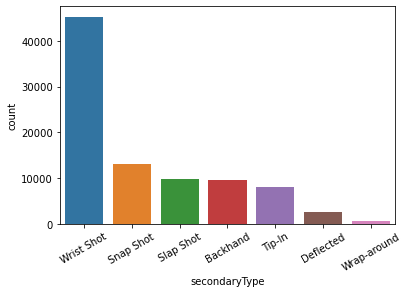

In [16]:
plot=sns.countplot(x = 'secondaryType',
              data = Goals,
              order = Goals['secondaryType'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(),rotation=30)

[Text(0, 0, 'Wrist Shot'),
 Text(1, 0, 'Slap Shot'),
 Text(2, 0, 'Snap Shot'),
 Text(3, 0, 'Backhand'),
 Text(4, 0, 'Tip-In'),
 Text(5, 0, 'Deflected'),
 Text(6, 0, 'Wrap-around')]

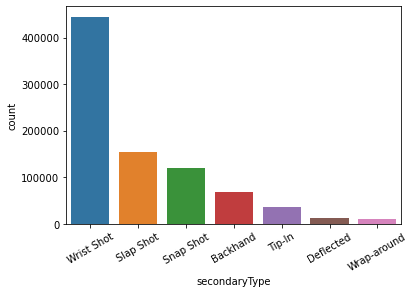

In [23]:
totalshots=shots_df.groupby('secondaryType').count()
plot2=sns.countplot(x = 'secondaryType',
              data = shots,
              order = shots_df['secondaryType'].value_counts().index)
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=30)

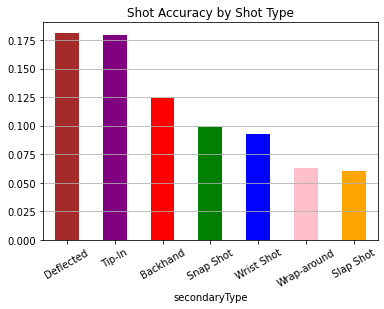

In [24]:
#Shot Accuracy by type
shotaccuracy=totalgoals/totalshots
shotaccuracy.iloc[:,1].loc[["Deflected", "Tip-In", "Backhand","Snap Shot","Wrist Shot","Wrap-around","Slap Shot"]].plot(kind='bar',title='Shot Accuracy by Shot Type',color=['brown', 'purple', 'red', 'g','b','pink','orange'],rot=30).grid(axis='y')

In [26]:
# sample shots w/o replacement
shots_sample_df = shots_df.sample(n=1000, replace=False)

# Split into training and testing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = shots_sample_df[['shot_type']]
y = shots_sample_df['event']
indicies = range(len(shots_sample_df))

# train with 75% of sample
X_train, X_test, y_train, y_test, train_indicies, test_indicies = train_test_split(X, y, indicies, test_size=0.25)

# Ensemble Learners
1.Train the model using the training data. 2.Calculate the balanced accuracy score from sklearn.metrics. 3.Print the confusion matrix from sklearn.metrics. 4.Generate a classication report using the imbalanced_classification_report from imbalanced-learn.

Balanced Random Forest Classifier

In [32]:
#Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100)
random_forest = random_forest.fit(X_train, y_train)

In [33]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5787480063795853

In [34]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  8,  14],
       [ 47, 181]])

In [36]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

       Goal       0.15      0.36      0.79      0.21      0.54      0.28        22
       Shot       0.93      0.79      0.36      0.86      0.54      0.30       228

avg / total       0.86      0.76      0.40      0.80      0.54      0.30       250



In [37]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(1.0, 'shot_type')]

# Easy Ensemble AdaBoost Classifier

In [38]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier(n_estimators = 100,random_state=1)
easy = easy.fit(X_train, y_train)

In [39]:
# Calculated the balanced accuracy score
y_pred = easy.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5935007974481659

In [40]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 10,  12],
       [ 61, 167]])

In [41]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

       Goal       0.14      0.45      0.73      0.22      0.58      0.32        22
       Shot       0.93      0.73      0.45      0.82      0.58      0.34       228

avg / total       0.86      0.71      0.48      0.77      0.58      0.34       250



# LogisticRegression

In [42]:
# perform logistic regression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# use the model on the test set and save the prob of goal
prob = logisticRegr.predict_proba(X_test)[:,[0]]

In [43]:
# print the model's score
score = logisticRegr.score(X_test, y_test)
print(score)

0.912


# Home Advantage Analysis

In [44]:
games = pd.read_csv('game.csv')
games.head()

game_id    season type         date_time_GMT  away_team_id  \
0  2016020045  20162017    R  2016-10-19T00:30:00Z             4   
1  2017020812  20172018    R  2018-02-07T00:00:00Z            24   
2  2015020314  20152016    R  2015-11-24T01:00:00Z            21   
3  2015020849  20152016    R  2016-02-17T00:00:00Z            52   
4  2017020586  20172018    R  2017-12-30T03:00:00Z            20   

   home_team_id  away_goals  home_goals       outcome home_rink_side_start  \
0            16           4           7  home win REG                right   
1             7           4           3   away win OT                 left   
2            52           4           1  away win REG                right   
3            12           1           2  home win REG                right   
4            24           1           2  home win REG                 left   

            venue           venue_link   venue_time_zone_id  \
0   United Center  /api/v1/venues/null      America/Chicago   
1  KeyBank Center  /api/v1/venues/null     America/New_York   
2      MTS Centre  /api/v1/venues/null     America/Winnipeg   
3       PNC Arena  /api/v1/venues/null     America/New_York   
4    Honda Center  /api/v1/venues/null  America/Los_Angeles   

   venue_time_zone_offset venue_time_zone_tz  
0                      -5                CDT  
1                      -4                EDT  
2                      -5                CDT  
3                      -4                EDT  
4                      -7                PDT

In [45]:
# Function decides if home team won by checking the goals scored by home and away team and returns appropriate result

def home_team_win(df):
    if df['home_goals'] > df['away_goals']:
        return 1
    else:
        return 0

games['home_team_win'] = games.apply(home_team_win, axis=1)

games.head()

game_id    season type         date_time_GMT  away_team_id  \
0  2016020045  20162017    R  2016-10-19T00:30:00Z             4   
1  2017020812  20172018    R  2018-02-07T00:00:00Z            24   
2  2015020314  20152016    R  2015-11-24T01:00:00Z            21   
3  2015020849  20152016    R  2016-02-17T00:00:00Z            52   
4  2017020586  20172018    R  2017-12-30T03:00:00Z            20   

   home_team_id  away_goals  home_goals       outcome home_rink_side_start  \
0            16           4           7  home win REG                right   
1             7           4           3   away win OT                 left   
2            52           4           1  away win REG                right   
3            12           1           2  home win REG                right   
4            24           1           2  home win REG                 left   

            venue           venue_link   venue_time_zone_id  \
0   United Center  /api/v1/venues/null      America/Chicago   
1  KeyBank Center  /api/v1/venues/null     America/New_York   
2      MTS Centre  /api/v1/venues/null     America/Winnipeg   
3       PNC Arena  /api/v1/venues/null     America/New_York   
4    Honda Center  /api/v1/venues/null  America/Los_Angeles   

   venue_time_zone_offset venue_time_zone_tz  home_team_win  
0                      -5                CDT              1  
1                      -4                EDT              0  
2                      -5                CDT              0  
3                      -4                EDT              1  
4                      -7                PDT              1

In [46]:
# Format for choosing only a single column: data_frame[column]

games = games[['season', 'type', 'home_goals', 'away_goals', 'venue', 'home_team_win']]

games.head()

season type  home_goals  away_goals           venue  home_team_win
0  20162017    R           7           4   United Center              1
1  20172018    R           3           4  KeyBank Center              0
2  20152016    R           1           4      MTS Centre              0
3  20152016    R           2           1       PNC Arena              1
4  20172018    R           2           1    Honda Center              1

In [47]:
# Format for conditional selection: data_frame[condition]

regularGames = games[games.type == 'R']

regularGames.head()

season type  home_goals  away_goals           venue  home_team_win
0  20162017    R           7           4   United Center              1
1  20172018    R           3           4  KeyBank Center              0
2  20152016    R           1           4      MTS Centre              0
3  20152016    R           2           1       PNC Arena              1
4  20172018    R           2           1    Honda Center              1

In [48]:
# Format: data_frame.column.mean()
regularGames.home_goals.mean()

2.9686146756187677

In [49]:
regularGames.away_goals.mean()

2.6901593103174286

In [50]:
regularGames.home_team_win.mean()

0.5347026339835526

<AxesSubplot:ylabel='home_team_win'>

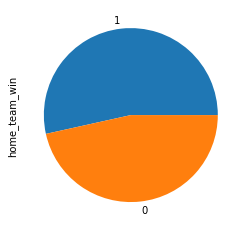

In [51]:
regularGames.home_team_win.value_counts().plot.pie()

# Logistic Regression Classification

In [52]:
#X = shot_log_model.drop(['SHOT_RESULT', 'FGM', 'PTS'], axis =1)
X = regularGames.drop(['home_team_win','type','venue'], axis =1)

#create target
y = regularGames['home_team_win']

# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    10102
0     8776
Name: home_team_win, dtype: int64 

 1    3357
0    2936
Name: home_team_win, dtype: int64


In [53]:
# Instantiating the model
logreg = LogisticRegression()

In [54]:
# Fitting the model with the train data
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, random_state=2,
                   solver='liblinear')

In [55]:
logreg.predict(X_test) # Shows the predicted outputs...will be compare below...

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
print("Model Score for the Test data:")
display(logreg.score(X_test, y_test)) # shows the accuracy of the model
print("Model Score for the Train data:")
display(logreg.score(X_train, y_train)) # shows the Logistic Regression Score

Model Score for the Test data:


0.5334498649292865

Model Score for the Train data:


0.5351202457887488

In [57]:
y_pred = logreg.predict(X_test)

In [58]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print(metrics.accuracy_score(y_test, y_pred)) # Percentage of correct predictions

0.5334498649292865


In [59]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2936
           1       0.53      1.00      0.70      3357

    accuracy                           0.53      6293
   macro avg       0.27      0.50      0.35      6293
weighted avg       0.28      0.53      0.37      6293



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Plays Analysis

In [96]:
team_info = pd.read_csv("team_info.csv")
team_stats = pd.read_csv("game_teams_stats.csv")
teams = team_info.merge(team_stats, on='team_id')
teams

team_id  franchiseId   shortName   teamName abbreviation  \
0            1           23  New Jersey     Devils          NJD   
1            1           23  New Jersey     Devils          NJD   
2            1           23  New Jersey     Devils          NJD   
3            1           23  New Jersey     Devils          NJD   
4            1           23  New Jersey     Devils          NJD   
...        ...          ...         ...        ...          ...   
52585       11           35     Atlanta  Thrashers          ATL   
52586       11           35     Atlanta  Thrashers          ATL   
52587       11           35     Atlanta  Thrashers          ATL   
52588       11           35     Atlanta  Thrashers          ATL   
52589       11           35     Atlanta  Thrashers          ATL   

                   link     game_id   HoA    won settled_in  ... shots  hits  \
0       /api/v1/teams/1  2016020107  home  False         OT  ...  32.0  22.0   
1       /api/v1/teams/1  2015020981  home  False        REG  ...  18.0  21.0   
2       /api/v1/teams/1  2017020482  away  False         OT  ...  32.0  27.0   
3       /api/v1/teams/1  2015020453  away   True        REG  ...  21.0  10.0   
4       /api/v1/teams/1  2017020952  home   True        REG  ...  33.0  34.0   
...                 ...         ...   ...    ...        ...  ...   ...   ...   
52585  /api/v1/teams/11  2001021062  away   True         OT  ...  15.0   NaN   
52586  /api/v1/teams/11  2001020861  away  False        REG  ...  25.0   NaN   
52587  /api/v1/teams/11  2001020628  home  False        REG  ...  25.0   NaN   
52588  /api/v1/teams/11  2001020436  away  False        REG  ...  25.0   NaN   
52589  /api/v1/teams/11  2001020101  home  False        REG  ...  35.0   NaN   

        pim  powerPlayOpportunities  powerPlayGoals  faceOffWinPercentage  \
0      10.0                     4.0             1.0                  43.3   
1      12.0                     3.0             0.0                  50.9   
2       6.0                     3.0             0.0                  49.1   
3       6.0                     1.0             0.0                  44.4   
4       4.0                     1.0             0.0                  47.3   
...     ...                     ...             ...                   ...   
52585  43.0                     2.0             0.0                   NaN   
52586   6.0                     2.0             0.0                   NaN   
52587   9.0                     2.0             1.0                   NaN   
52588  19.0                     2.0             1.0                   NaN   
52589   8.0                     5.0             0.0                   NaN   

       giveaways  takeaways  blocked  startRinkSide  
0            7.0        7.0     16.0          right  
1            7.0        2.0      2.0          right  
2           12.0        5.0     25.0           left  
3            2.0        4.0     18.0          right  
4           11.0       11.0      9.0          right  
...          ...        ...      ...            ...  
52585        NaN        NaN      NaN          right  
52586        NaN        NaN      NaN           left  
52587        NaN        NaN      NaN            NaN  
52588        NaN        NaN      NaN          right  
52589        NaN        NaN      NaN            NaN  

[52590 rows x 22 columns]

In [97]:
teams.columns

Index(['team_id', 'franchiseId', 'shortName', 'teamName', 'abbreviation',
       'link', 'game_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide'],
      dtype='object')

In [98]:
teams.dropna(inplace=True)
teams

team_id  franchiseId   shortName   teamName abbreviation  \
0            1           23  New Jersey     Devils          NJD   
1            1           23  New Jersey     Devils          NJD   
2            1           23  New Jersey     Devils          NJD   
3            1           23  New Jersey     Devils          NJD   
4            1           23  New Jersey     Devils          NJD   
...        ...          ...         ...        ...          ...   
51844       11           35     Atlanta  Thrashers          ATL   
51847       11           35     Atlanta  Thrashers          ATL   
51849       11           35     Atlanta  Thrashers          ATL   
51852       11           35     Atlanta  Thrashers          ATL   
51853       11           35     Atlanta  Thrashers          ATL   

                   link     game_id   HoA    won settled_in  ... shots  hits  \
0       /api/v1/teams/1  2016020107  home  False         OT  ...  32.0  22.0   
1       /api/v1/teams/1  2015020981  home  False        REG  ...  18.0  21.0   
2       /api/v1/teams/1  2017020482  away  False         OT  ...  32.0  27.0   
3       /api/v1/teams/1  2015020453  away   True        REG  ...  21.0  10.0   
4       /api/v1/teams/1  2017020952  home   True        REG  ...  33.0  34.0   
...                 ...         ...   ...    ...        ...  ...   ...   ...   
51844  /api/v1/teams/11  2010020593  away   True        REG  ...  31.0  19.0   
51847  /api/v1/teams/11  2010020369  away  False        REG  ...  22.0  15.0   
51849  /api/v1/teams/11  2010020356  away   True         OT  ...  31.0  16.0   
51852  /api/v1/teams/11  2010020726  away  False        REG  ...  22.0  22.0   
51853  /api/v1/teams/11  2010020788  away  False         OT  ...  37.0  17.0   

        pim  powerPlayOpportunities  powerPlayGoals  faceOffWinPercentage  \
0      10.0                     4.0             1.0                  43.3   
1      12.0                     3.0             0.0                  50.9   
2       6.0                     3.0             0.0                  49.1   
3       6.0                     1.0             0.0                  44.4   
4       4.0                     1.0             0.0                  47.3   
...     ...                     ...             ...                   ...   
51844   4.0                     6.0             1.0                  54.4   
51847   9.0                     2.0             1.0                  46.2   
51849   8.0                     4.0             0.0                  50.0   
51852   6.0                     2.0             0.0                  46.6   
51853  16.0                     6.0             0.0                  40.0   

       giveaways  takeaways  blocked  startRinkSide  
0            7.0        7.0     16.0          right  
1            7.0        2.0      2.0          right  
2           12.0        5.0     25.0           left  
3            2.0        4.0     18.0          right  
4           11.0       11.0      9.0          right  
...          ...        ...      ...            ...  
51844        0.0        7.0     18.0           left  
51847        2.0        3.0      7.0          right  
51849        7.0       12.0     18.0           left  
51852        7.0        6.0     16.0          right  
51853        8.0        5.0     13.0           left  

[29554 rows x 22 columns]

In [99]:
teams.fillna(0)
teams

team_id  franchiseId   shortName   teamName abbreviation  \
0            1           23  New Jersey     Devils          NJD   
1            1           23  New Jersey     Devils          NJD   
2            1           23  New Jersey     Devils          NJD   
3            1           23  New Jersey     Devils          NJD   
4            1           23  New Jersey     Devils          NJD   
...        ...          ...         ...        ...          ...   
51844       11           35     Atlanta  Thrashers          ATL   
51847       11           35     Atlanta  Thrashers          ATL   
51849       11           35     Atlanta  Thrashers          ATL   
51852       11           35     Atlanta  Thrashers          ATL   
51853       11           35     Atlanta  Thrashers          ATL   

                   link     game_id   HoA    won settled_in  ... shots  hits  \
0       /api/v1/teams/1  2016020107  home  False         OT  ...  32.0  22.0   
1       /api/v1/teams/1  2015020981  home  False        REG  ...  18.0  21.0   
2       /api/v1/teams/1  2017020482  away  False         OT  ...  32.0  27.0   
3       /api/v1/teams/1  2015020453  away   True        REG  ...  21.0  10.0   
4       /api/v1/teams/1  2017020952  home   True        REG  ...  33.0  34.0   
...                 ...         ...   ...    ...        ...  ...   ...   ...   
51844  /api/v1/teams/11  2010020593  away   True        REG  ...  31.0  19.0   
51847  /api/v1/teams/11  2010020369  away  False        REG  ...  22.0  15.0   
51849  /api/v1/teams/11  2010020356  away   True         OT  ...  31.0  16.0   
51852  /api/v1/teams/11  2010020726  away  False        REG  ...  22.0  22.0   
51853  /api/v1/teams/11  2010020788  away  False         OT  ...  37.0  17.0   

        pim  powerPlayOpportunities  powerPlayGoals  faceOffWinPercentage  \
0      10.0                     4.0             1.0                  43.3   
1      12.0                     3.0             0.0                  50.9   
2       6.0                     3.0             0.0                  49.1   
3       6.0                     1.0             0.0                  44.4   
4       4.0                     1.0             0.0                  47.3   
...     ...                     ...             ...                   ...   
51844   4.0                     6.0             1.0                  54.4   
51847   9.0                     2.0             1.0                  46.2   
51849   8.0                     4.0             0.0                  50.0   
51852   6.0                     2.0             0.0                  46.6   
51853  16.0                     6.0             0.0                  40.0   

       giveaways  takeaways  blocked  startRinkSide  
0            7.0        7.0     16.0          right  
1            7.0        2.0      2.0          right  
2           12.0        5.0     25.0           left  
3            2.0        4.0     18.0          right  
4           11.0       11.0      9.0          right  
...          ...        ...      ...            ...  
51844        0.0        7.0     18.0           left  
51847        2.0        3.0      7.0          right  
51849        7.0       12.0     18.0           left  
51852        7.0        6.0     16.0          right  
51853        8.0        5.0     13.0           left  

[29554 rows x 22 columns]

In [100]:
#make the 'won' column data binary
teams['won'] = teams['won']*1

teams = pd.concat([teams, pd.get_dummies(teams.HoA).rename(columns = '{}_binary'.format)],axis = 1)
teams = pd.concat([teams, pd.get_dummies(teams.settled_in).rename(columns = '{}_binary'.format)],axis = 1)
df_clean = teams.drop(['game_id','team_id','HoA','settled_in','head_coach','away_binary','OT_binary'], axis=1)
df_clean.head()

franchiseId   shortName teamName abbreviation             link  won  goals  \
0           23  New Jersey   Devils          NJD  /api/v1/teams/1    0    2.0   
1           23  New Jersey   Devils          NJD  /api/v1/teams/1    0    1.0   
2           23  New Jersey   Devils          NJD  /api/v1/teams/1    0    1.0   
3           23  New Jersey   Devils          NJD  /api/v1/teams/1    1    2.0   
4           23  New Jersey   Devils          NJD  /api/v1/teams/1    1    2.0   

   shots  hits   pim  powerPlayOpportunities  powerPlayGoals  \
0   32.0  22.0  10.0                     4.0             1.0   
1   18.0  21.0  12.0                     3.0             0.0   
2   32.0  27.0   6.0                     3.0             0.0   
3   21.0  10.0   6.0                     1.0             0.0   
4   33.0  34.0   4.0                     1.0             0.0   

   faceOffWinPercentage  giveaways  takeaways  blocked startRinkSide  \
0                  43.3        7.0        7.0     16.0         right   
1                  50.9        7.0        2.0      2.0         right   
2                  49.1       12.0        5.0     25.0          left   
3                  44.4        2.0        4.0     18.0         right   
4                  47.3       11.0       11.0      9.0         right   

   home_binary  REG_binary  
0            1           0  
1            1           1  
2            0           0  
3            0           1  
4            1           1

In [101]:
teams.dtypes


team_id                     int64
franchiseId                 int64
shortName                  object
teamName                   object
abbreviation               object
link                       object
game_id                     int64
HoA                        object
won                         int64
settled_in                 object
head_coach                 object
goals                     float64
shots                     float64
hits                      float64
pim                       float64
powerPlayOpportunities    float64
powerPlayGoals            float64
faceOffWinPercentage      float64
giveaways                 float64
takeaways                 float64
blocked                   float64
startRinkSide              object
away_binary                 uint8
home_binary                 uint8
OT_binary                   uint8
REG_binary                  uint8
dtype: object

In [102]:
print(teams.goals.astype(np.float32))
print(teams.shots.astype(np.float32))
print(teams.hits.astype(np.float32))
print(teams.pim.astype(np.float32))
print(teams.powerPlayOpportunities.astype(np.float32))
print(teams.powerPlayGoals.astype(np.float32))
print(teams.faceOffWinPercentage.astype(np.float32))
print(teams.giveaways.astype(np.float32))
print(teams.takeaways.astype(np.float32))
print(teams.blocked  .astype(np.float32))

0        2.0
1        1.0
2        1.0
3        2.0
4        2.0
        ... 
51844    3.0
51847    2.0
51849    3.0
51852    1.0
51853    3.0
Name: goals, Length: 29554, dtype: float32
0        32.0
1        18.0
2        32.0
3        21.0
4        33.0
         ... 
51844    31.0
51847    22.0
51849    31.0
51852    22.0
51853    37.0
Name: shots, Length: 29554, dtype: float32
0        22.0
1        21.0
2        27.0
3        10.0
4        34.0
         ... 
51844    19.0
51847    15.0
51849    16.0
51852    22.0
51853    17.0
Name: hits, Length: 29554, dtype: float32
0        10.0
1        12.0
2         6.0
3         6.0
4         4.0
         ... 
51844     4.0
51847     9.0
51849     8.0
51852     6.0
51853    16.0
Name: pim, Length: 29554, dtype: float32
0        4.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
51844    6.0
51847    2.0
51849    4.0
51852    2.0
51853    6.0
Name: powerPlayOpportunities, Length: 29554, dtype: float32
0        1.0
1        0

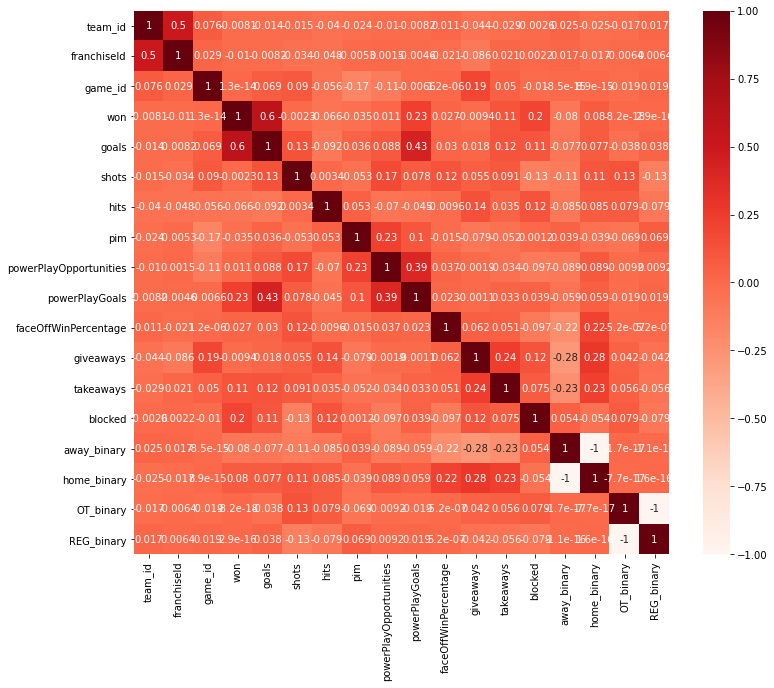

In [103]:
plt.figure(figsize=(12,10))
cor = teams.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [104]:
teams.isnull

<bound method DataFrame.isnull of        team_id  franchiseId   shortName   teamName abbreviation  \
0            1           23  New Jersey     Devils          NJD   
1            1           23  New Jersey     Devils          NJD   
2            1           23  New Jersey     Devils          NJD   
3            1           23  New Jersey     Devils          NJD   
4            1           23  New Jersey     Devils          NJD   
...        ...          ...         ...        ...          ...   
51844       11           35     Atlanta  Thrashers          ATL   
51847       11           35     Atlanta  Thrashers          ATL   
51849       11           35     Atlanta  Thrashers          ATL   
51852       11           35     Atlanta  Thrashers          ATL   
51853       11           35     Atlanta  Thrashers          ATL   

                   link     game_id   HoA  won settled_in  ... powerPlayGoals  \
0       /api/v1/teams/1  2016020107  home    0         OT  ...            1.0   

<ipython-input-106-098a28bf890c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.3629886  0.09567705 0.09526782 0.08493252 0.10025494 0.07966775
 0.09040789 0.03242157 0.05838187]


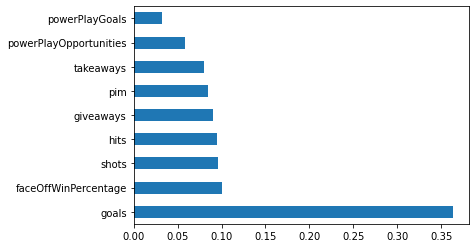

In [106]:
from sklearn.ensemble import ExtraTreesClassifier
X = teams[['goals','shots','hits','pim','faceOffWinPercentage','takeaways','giveaways','powerPlayGoals','powerPlayOpportunities']]  #independent columns
y = teams[['won']]   #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

# Support Vector Machines

In [107]:
from sklearn.svm import SVC 
from sklearn import preprocessing, neighbors, svm

In [108]:
X = teams[['goals','shots','hits','pim','faceOffWinPercentage','takeaways','giveaways','powerPlayGoals','powerPlayOpportunities']]  #independent columns
y = teams[['won']]   #target column 

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(22165, 9)

In [110]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [111]:

X = teams[['goals','shots','hits','pim','faceOffWinPercentage','takeaways','giveaways','powerPlayGoals','powerPlayOpportunities']]  #independent columns
y = teams[['won']]   #target column i.e price range
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
score=accuracy_score(y_test,svm_predictions)
score

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7775071051563135

# Logistic Regression

In [112]:
X = teams[['goals','shots','hits','pim','faceOffWinPercentage','takeaways','giveaways','powerPlayGoals','powerPlayOpportunities']]  
y = teams[['won']]  

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

logmodel=LogisticRegression()

logmodel.fit(X_train,y_train)

log_predictions=logmodel.predict(X_test)

score2=accuracy_score(y_test,log_predictions)
score2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7779131140885099